# Fundamental 14. 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?

## 14-3-(1) (raw_train, raw_validation, raw_test), metadata = tfds.load
#### metadata가 뭐죠?
- https://www.tensorflow.org/lite/convert/metadata#:~:text=TensorFlow%20Lite%20metadata%20provides%20a,when%20using%20the%20model%2C%20and
- [tfds.load](https://www.tensorflow.org/datasets/api_docs/python/tfds/load)

In [ ]:
# metadata가 뭔지 프린트해보기
metadata
metadata.features

https://www.tensorflow.org/datasets/splits

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

## 14-3-(2)Corrupt files in the dogs_vs_cats dataset
- Warning 왜 뜨는지 아시는 분?

https://github.com/tensorflow/datasets/issues/2188

https://colab.research.google.com/drive/1cyWbe4Nw5xOq5k9S2-qLC24U_WVNzRYW?usp=sharing#scrollTo=fXT8EyaxIPKi

https://keras.io/examples/vision/learnable_resizer/

## 14-4-(1) Three integers (nrows, ncols, index). 

In [ ]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

## 14-4-(2) matplotlib
 
https://korbillgates.tistory.com/85  
    
%config InlineBackend.figure_format = 'retina' 를 %matplotlib 뒤에 넣어주면 그래프를 더 높은 해상도로 출력한다.  
Use %config InlineBackend.figure_format = 'retina' after %matplotlib inline to render higher resolution images.  
출처: https://iltaek.tistory.com/3 [삽질의 조각들]


### plt.legend()
- 범례 (Legend)는 그래프에 데이터의 종류를 표시하기 위한 텍스트입니다.
- 위치도 설정 가능 https://codetorial.net/matplotlib/set_legend.html

In [ ]:
# plt.legend(loc=(0.0, 0.0))
# plt.legend(loc=(0.5, 0.5))
plt.legend(loc=(1.0, 1.0))

## 14-7-(1) image_batch, label_batch 
직접 프린트해보기

In [ ]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

print(predictions)

# image_batch, label_batch

## 14-7-(2) predictions = np.argmax(predictions, axis=1)
https://www.sharpsightlabs.com/blog/numpy-argmax/
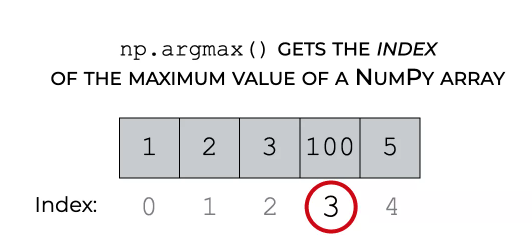

- axis = 0 : 열 ??
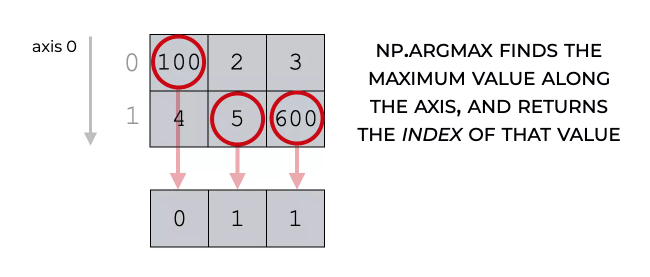

- axis = 1 : 행 ??
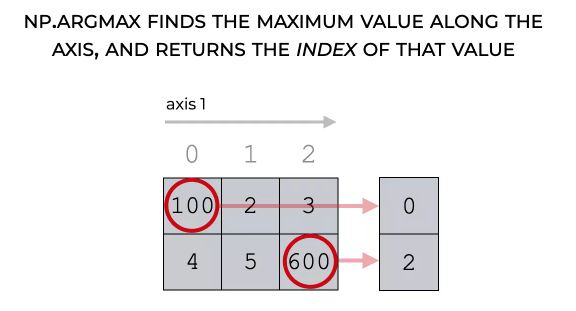

## 14-9 VGG16 – Convolutional Network for Classification and Detection
https://neurohive.io/en/popular-networks/vgg16/
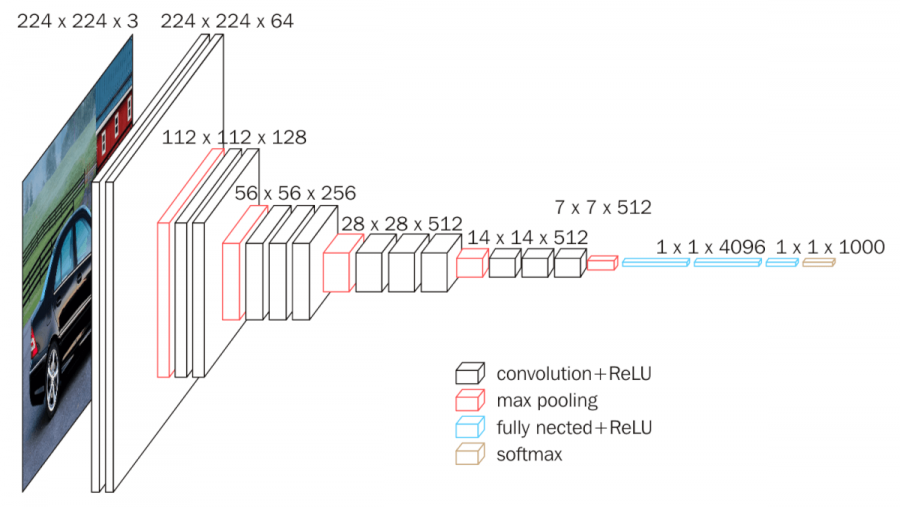

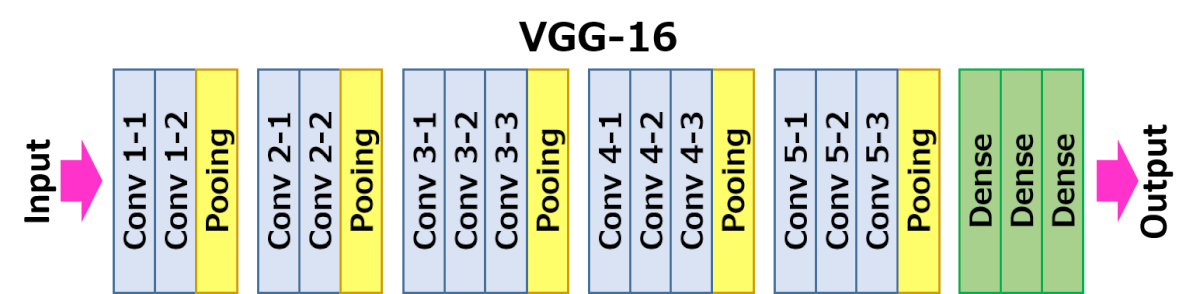
- Dense Layer 3개는 customize -> transfer learning 

## 14-10-(1) When to use global average pooling
https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-2d
- Global Average Pooling은 위와 같이 3차원의 벡터가 있을 때, 겹겹이 쌓여있는 2차원 배열의 평균을 구한 후 하나의 값으로 축소하는 기법입니다.

- Use global average pooling blocks as an alternative to the Flattening block after the last pooling block of your convolutional neural network. Using 2D Global average pooling block can replace the fully connected blocks of your CNN.

## 14-10-(2) `base_model` 학습 안시키는 이유? 
VGG16에 해당하는 base_model이기 때문 !! 즉, 사전 학습된 ConvNet을 이용한 전이 학습  
https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko

## 14-11-(1) plt.ylabel('Cross Entropy')
## 손실 함수
공식문서: https://www.tensorflow.org/api_docs/python/tf/keras/losses  
- 한글 블로그: https://didu-story.tistory.com/27, https://nuguziii.github.io/dev/dev-002/
- 영문 블로그: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#:~:text=Cross%2Dentropy%20loss%2C%20or%20log,diverges%20from%20the%20actual%20label.  
> Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

## 14-11-(2) matplotlib.axes.Axes.set_ylim
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html

- Set the y-axis view limits.

In [ ]:
set_ylim(bottom, top)
set_ylim((bottom, top))
bottom, top = set_ylim(bottom, top)

#set_ylim(5000, 0) 